In [1]:
from cobaya.yaml import yaml_load_file
import getdist.plots as gdplt
import getdist
from cobaya import load_samples
import numpy as np
%matplotlib inline 

['h', 'omega_b', 'omega_cdm', 'logA', 'n_s', 'b1_ngc_z1', 'b1_sgc_z1', 'b1_ngc_z3', 'b1_sgc_z3', 'b2_ngc_z1', 'b2_sgc_z1', 'b2_ngc_z3', 'b2_sgc_z3', 'bG2_ngc_z1', 'bG2_sgc_z1', 'bG2_ngc_z3', 'bG2_sgc_z3', 'A_s', 'minuslogprior', 'minuslogprior__0', 'chi2', 'chi2__pbjboss']


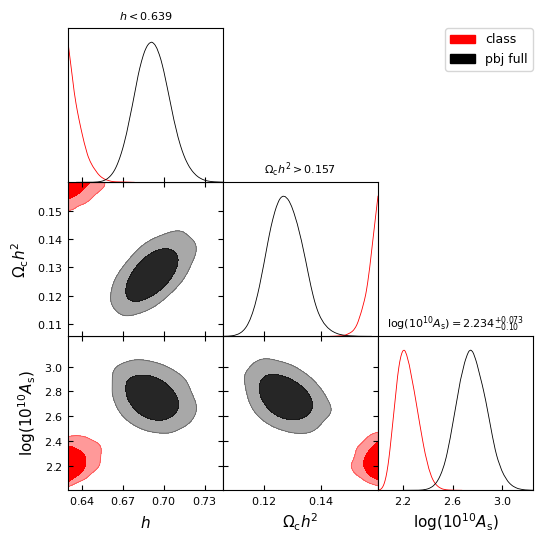

In [3]:

boss_full = load_samples('/home/fverdian/cobaya/chains-buone/pbjboss_full/full', to_getdist=True)
boss_full.label='pbj full'
print([pn.name for pn in boss_full.paramNames.names])

boss_fx = load_samples('/home/fverdian/cobaya/chains/boss_class/bossclasspbj', to_getdist=True)
boss_fx.label='class'

p=boss_fx.getParams()
# boss_fx.addDerived(0.4*p.fx/0.03, name='M', label=r'M', range=[0.,None])


pars_toplot =['h','omega_cdm', 'logA']
# pars_toplot =['h', 'omega_b',]
gdplot = gdplt.get_subplot_plotter()

gdplot.triangle_plot([ boss_fx, boss_full],  pars_toplot, contour_colors=['r','k'], title_limit=1, filled=True)
# gdplot.finish_plot(no_tight=True)


In [15]:
gdplot.fig.savefig('/home/fverdian/cobaya/chains/pbjboss_full/contour_pbjbossfull.pdf', bbox_inches='tight')

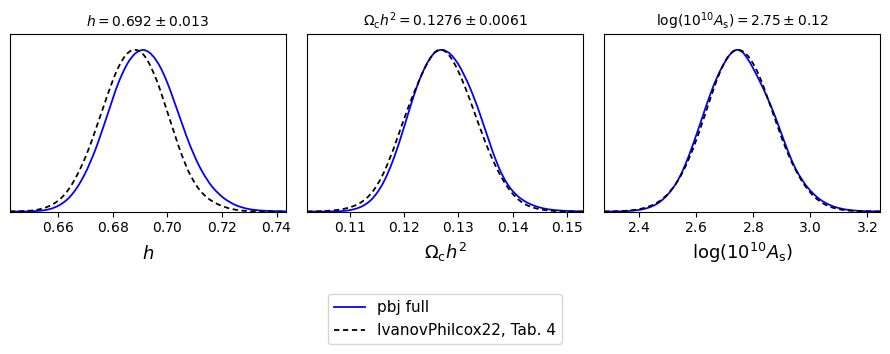

In [65]:
gdplot = gdplt.get_subplot_plotter(subplot_size=3)
gdplot.settings.linewidth=1.5
gdplot.settings.subplot_size_ratio=0.95
gdplot.settings.figure_legend_loc='lower center'

gdplot.plots_1d([boss_full, ivphyl],  pars_toplot, colors=['b','k'], nx=3,  title_limit=1, legend_ncol=1 ,ls=['-','--'])
gdplot.finish_plot()
# gdplot.fig.savefig('/home/fverdian/cobaya/chains/pbjboss_full/pbjboss_ivphyl.pdf')


---
CMB

In [2]:

cmb1 = load_samples('/home/fverdian/cobaya/chains/planck_cosmopower/planck', to_getdist=True)
print([pn.name for pn in cmb1.paramNames.names])
cmb1.label='cosmopower'
cmb2 = load_samples('/home/fverdian/cobaya/chains/planck_camb/planck', to_getdist=True)
cmb2.label='camb'
cmb_class = load_samples('/home/fverdian/cobaya/chains/planck_class/planck', to_getdist=True)
cmb_class.label='class'

['logA', 'ns', 'h', 'ombh2', 'omch2', 'tau', 'A_planck', 'chi2__CMB', 'minuslogprior', 'minuslogprior__0', 'chi2', 'chi2__planck_2018_lowl.TT', 'chi2__planck_2018_lowl.EE', 'chi2__planck_2018_highl_plik.TTTEEE_lite_native']


In [50]:
%matplotlib inline 
pars_toplot = ['h','ombh2','omch2','logA', 'ns']
gdplot = gdplt.get_subplot_plotter()

gdplot.triangle_plot([cmb2, cmb1, cmb_class], pars_toplot, filled=True, title_limit=1)


NameError: name 'cmb2' is not defined

['h', 'omega_b', 'omega_cdm', 'logA', 'n_s', 'b1_ngc_z1', 'b1_sgc_z1', 'b1_ngc_z3', 'b1_sgc_z3', 'A_s', 'minuslogprior', 'minuslogprior__0', 'chi2', 'chi2__pbjboss']


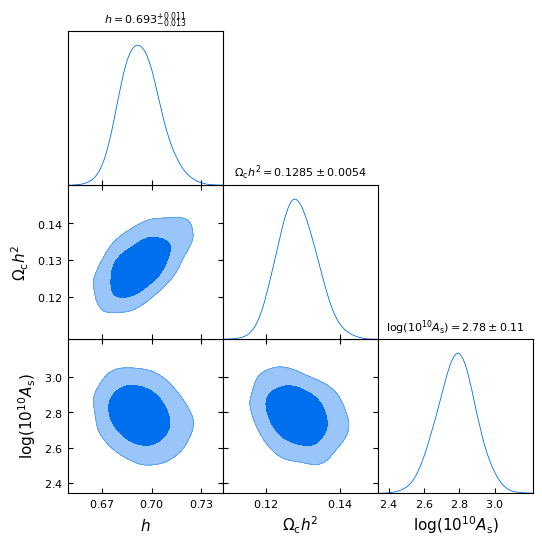

---
combare boss with IvanovPhilcox

In [41]:
cosmolist=['h', 'omega_cdm', 'logA', 'n_s']
means=[0.688, 0.1268, 2.75,0.9649]
cov = np.diag(np.array([ 0.012, 0.0062, 0.12,0.0042])**2)

parlabels= ['h','\Omega_c h^2',  '\log{10^{10} A_s}', 'n_s']
ivphyl = getdist.MCSamples(samples = np.random.multivariate_normal(means, cov, 10000) ,
                        label='IvanovPhilcox22, Tab. IV',
                        names = cosmolist,
                        labels=parlabels,
                        ranges={'Mnu':[0.001,0.2],'Ombh2':[0.0216,None]})

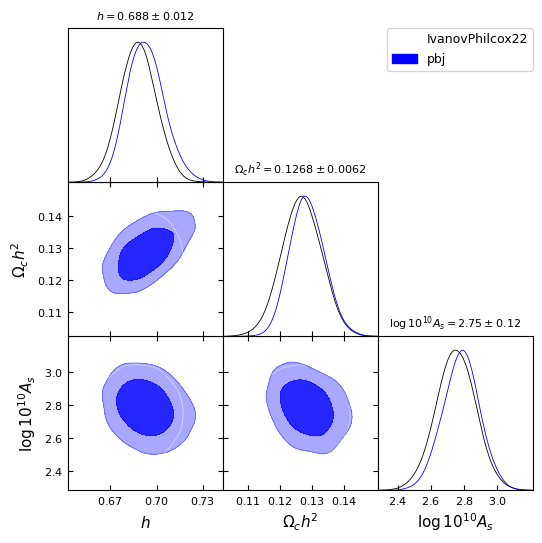

In [6]:
gdplot = gdplt.get_subplot_plotter()
gdplot.settings.solid_colors=list(reversed(['k','blue']))
gdplot.triangle_plot([ivphyl,boss], pars_toplot, colors=['white','blue'], filled=True, title_limit=1)
